In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine) 

In [11]:
# View all of the classes that automap found
classes = [class_item[0] for class_item in base.classes.items()]
print(classes)

['station', 'measurement']


In [12]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()[0]
recent_date

'2017-08-23'

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
twelve_months = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
# Starting from the most recent data point in the database. 
twelve_months_str = twelve_months.strftime("%Y-%m-%d")
# Calculate the date one year from the last date in data set.
print(twelve_months_str)



2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores
twelve_months = session.query(measurement.date, measurement.prcp).filter(measurement.date >= twelve_months_str).all()
twelve_months

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(twelve_months).rename(columns={"prcp":"Precipitation","date":"Date"})
precipitation_df.set_index("Date", inplace = True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [20]:
# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<function matplotlib.pyplot.show(close=None, block=None)>

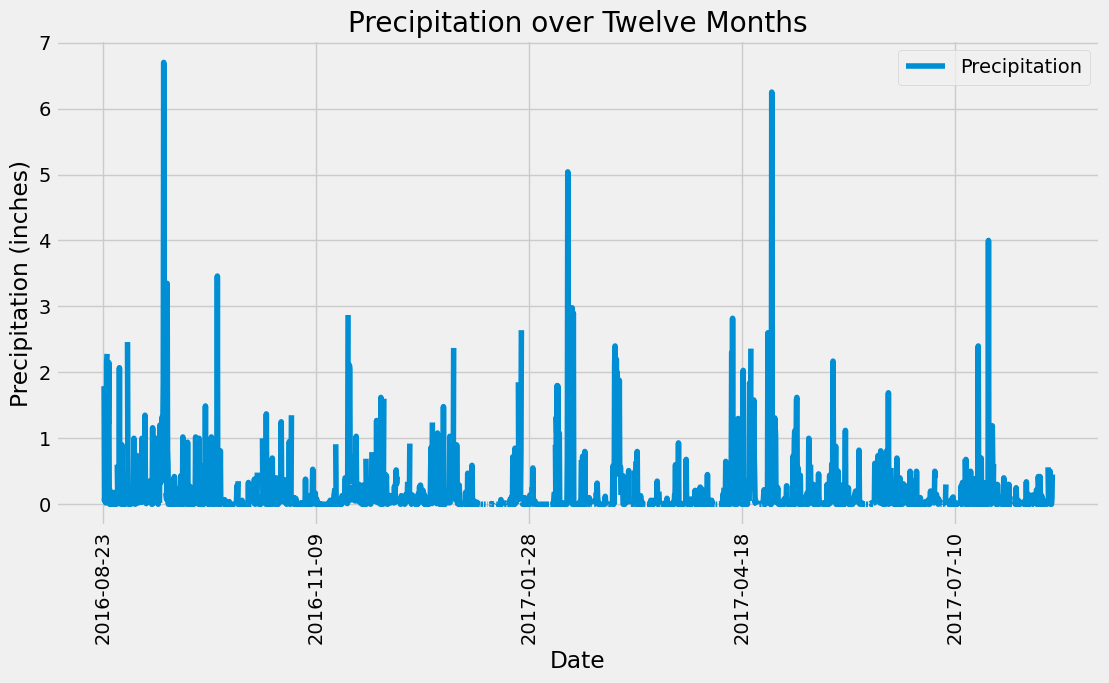

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot( figsize=(12,6),
                                   title="Precipitation over Twelve Months",
                                   xlabel="Date",
                                   ylabel="Precipitation (inches)")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Date")
plt.show


In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.describe().round(2)
print(summary_statistics)

       Precipitation
count        2021.00
mean            0.18
std             0.46
min             0.00
25%             0.00
50%             0.02
75%             0.13
max             6.70


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [33]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

min_temp, max_temp, avg_temp = most_active_stations[0]
avg_temp = round(avg_temp,1)

print(f"Min_Temperative: {min_temp}, Max_Temperature: {max_temp}, Avg_Temperature: {avg_temp}")

Min_Temperative: 54.0, Max_Temperature: 85.0, Avg_Temperature: 71.7


In [42]:
#Most active station USC00519281 temp data
most_active_station_USC00519281 = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= twelve_months_str).all()
most_active_station_USC00519281

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [43]:
#Query most active station results to Pandas dataframe
most_active_station_USC00519281_df = pd.DataFrame(most_active_station_USC00519281).rename(columns={"tobs":"Temperature"})
most_active_station_USC00519281_df.head()


,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<function matplotlib.pyplot.show(close=None, block=None)>

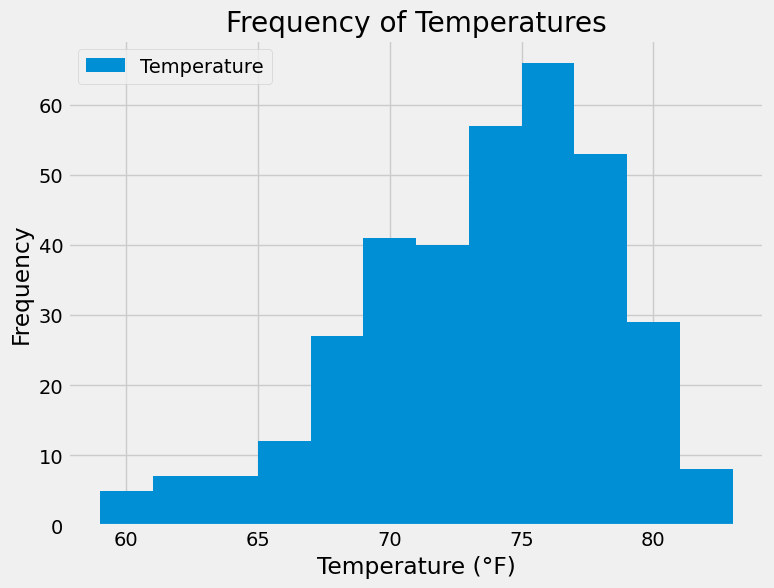

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_USC00519281_df.plot(kind="hist", figsize=(8,6), bins=12,
                                   title="Frequency of Temperatures",
                                   xlabel="Temperature (°F)",
                                   ylabel="Frequency")



plt.show

# Close Session

In [48]:
# Close Session
session.close()